In [ ]:
#Project_3
#face detection

This code will open your camera and take a photo of you and then it will detect your face

In [ ]:
!pip install tensorflow
!pip install keras
!pip install opencv-python
!pip install scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!git clone https://github.com/davidsandberg/facenet.git

Cloning into 'facenet'...
remote: Enumerating objects: 3149, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3149 (delta 0), reused 0 (delta 0), pack-reused 3146
Receiving objects: 100% (3149/3149), 2.92 MiB | 35.61 MiB/s, done.
Resolving deltas: 100% (2233/2233), done.


In [ ]:
%cd facenet

/content/facenet/facenet/facenet


In [ ]:
!python download_and_extract_model.py

python3: can't open file '/content/facenet/facenet/facenet/download_and_extract_model.py': [Errno 2] No such file or directory


In [ ]:
import os
from os import listdir
from PIL import Image as Img
from numpy import asarray
from numpy import expand_dims
from matplotlib import pyplot
from keras.models import load_model
import numpy as np
import tensorflow as tf

import pickle
import cv2

In [ ]:
HaarCascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
!wget "https://drive.google.com/file/d/1Wy6Mg4Ve7v-I_zLO5Fk1Q7wAPcgPbRig/view?usp=share_link"

--2023-06-13 21:40:49--  https://drive.google.com/file/d/1Wy6Mg4Ve7v-I_zLO5Fk1Q7wAPcgPbRig/view?usp=share_link
Resolving drive.google.com (drive.google.com)... 172.253.62.100, 172.253.62.139, 172.253.62.101, ...
Connecting to drive.google.com (drive.google.com)|172.253.62.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view?usp=share_link’

view?usp=share_link     [ <=>                ]  73.89K  --.-KB/s    in 0.002s  

2023-06-13 21:40:49 (43.4 MB/s) - ‘view?usp=share_link’ saved [75660]



In [ ]:
# !pip install tensorflow==1.15
!pip install keras-facenet
!pip install facenet-pytorch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras_facenet import FaceNet
# from facenet_pytorch import MTCNN, InceptionResnetV1

In [ ]:
embedder = FaceNet()
# from facenet_pytorch import InceptionResnetV1

# # Initialize the FaceNet model
# embedder = InceptionResnetV1(pretrained='vggface2').eval()


In [ ]:
detections = embedder.extract('/content/Picsart_23-05-08_14-52-04-490.png', threshold=0.95)

1/1 [==============================] - 1s 1s/step


In [ ]:
MyFaceNet = FaceNet()

In [ ]:

database = {}

# for filename in listdir(folder):

#     path = folder + filename
gbr1 = cv2.imread('/content/faces/Picsart_23-05-08_14-52-04-490.png')
wajah = HaarCascade.detectMultiScale(gbr1,1.1,4)

if len(wajah)>0:
  x1, y1, width, height = wajah[0]
else:
  x1, y1, width, height = 1, 1, 10, 10

  x1, y1 = abs(x1), abs(y1)
  x2, y2 = x1 + width, y1 + height

  gbr = cv2.cvtColor(gbr1, cv2.COLOR_BGR2RGB)
  gbr = Img.fromarray(gbr)                  # konversi dari OpenCV ke PIL
  gbr_array = asarray(gbr)

  face = gbr_array[y1:y2, x1:x2]

  face = Img.fromarray(face)
  face = face.resize((160,160))
  face = asarray(face)


  face = expand_dims(face, axis=0)
  signature = MyFaceNet.embeddings(face)

  database[0]=signature

In [ ]:
myfile = open("data.pkl", "wb")
pickle.dump(database, myfile)
myfile.close()

In [ ]:
myfile = open("data.pkl", "rb")
database = pickle.load(myfile)
myfile.close()

In [ ]:
def js_to_image(js_reply):
  image_bytes = b64decode(js_reply.split(',')[1])
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  img = cv2.imdecode(jpg_as_np, flags=1)
  return img

In [ ]:
def findFaces(data):
  gbr1 = js_to_image(data)
  gbr = cv2.cvtColor(gbr1, cv2.COLOR_BGR2RGB)
  gbr = Img.fromarray(gbr)                  # konversi dari OpenCV ke PIL
  gbr_array = asarray(gbr)

  wajah = HaarCascade.detectMultiScale(gbr1,1.1,4)

  for (x1,y1,w,h) in wajah:
      x1, y1 = abs(x1), abs(y1)
      x2, y2 = x1 + w, y1 + h

      face = gbr_array[y1:y2, x1:x2]

      face = Img.fromarray(face)
      face = face.resize((160,160))
      face = asarray(face)

      face = face.astype('float32')
      mean, std = face.mean(), face.std()
      face = (face - mean) / std

      face = expand_dims(face, axis=0)
      signature = MyFaceNet.embeddings(face)


      min_dist=100
      identity=' '
      for key, value in database.items() :
        dist = np.linalg.norm(value-signature)
        if dist < min_dist:
          min_dist = dist
          identity = key

      cv2.putText(gbr1,identity, (x1,y1),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1, cv2.LINE_AA)
      cv2.rectangle(gbr1,(x1,y1),(x2,y2), (0,255,0), 2)

  filename='photo.jpg'
  cv2.imwrite(filename, gbr1)

  return filename

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))

  filename=findFaces(data)

  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


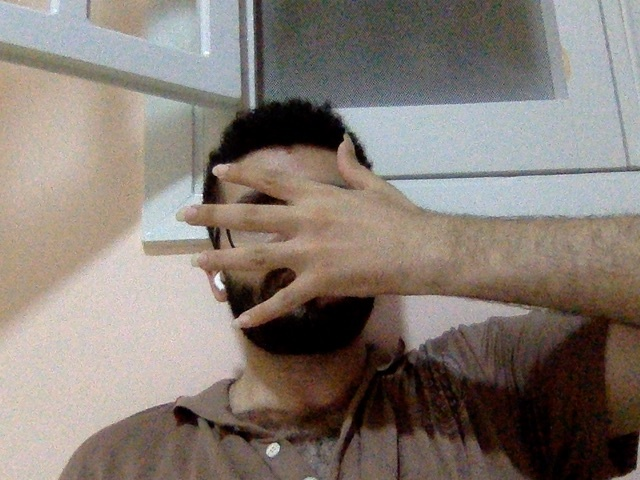

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))